In [1]:
import tensorflow as tf
print("Num of GPUs available:", len(tf.config.experimental.list_physical_devices("GPU")))

Num of GPUs available: 0


In [2]:
import numpy as np
import cv2
import os
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam,RMSprop,SGD
from keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.models import Sequential

from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Constants

In [3]:
LABELS = ["German_shephard","Doberman","Chihuahua","Golden_Retriver","Labrador","Siberian_Husky","Pug","French_bulldog","Shih_Tzu","Tibetian_Mastiff"]

In [4]:
german_shepherd_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/german_shepherd/*")
doberman_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/doberman/*")
chihuahua_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/chihuahua/*")
golden_retriever_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/golden_retriever/*")
labrador_retriever_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/labrador_retriever/*") 
siberian_husky_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/siberian_husky/*")
pug_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/pug/*")
french_bulldog_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/french_bulldog/*")
shih_tzu_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/shih_tzu/*")
tibetan_mastiff_paths = glob("C:/Users/ASUS/Desktop/Data/Dog_breed/tibetan_mastiff/*") 

In [5]:
images = []
labels = []

for im_path in german_shepherd_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(0)
    except:
        print(im_path)

for im_path in doberman_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(1)
    except:
        print(im_path)
    
for im_path in chihuahua_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(2)
    except:
        print(im_path)

for im_path in golden_retriever_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(3)
    except:
        print(im_path)

for im_path in labrador_retriever_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(4)  
    except:
        print(im_path)
    
for im_path in siberian_husky_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(5)  
    except:
        print(im_path)

for im_path in pug_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(6)  
    except:
        print(im_path)

for im_path in french_bulldog_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(7)  
    except:
        print(im_path)

for im_path in shih_tzu_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(8)  
    except:
        print(im_path)

for im_path in tibetan_mastiff_paths:
    try:
        img = cv2.imread(im_path)
        img = cv2.resize(img,(229,229)) # VGG19's default input shape is 224x224
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(9)  
    except:
        print(im_path)

data = np.array(images)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(2000, 229, 229, 3)
(2000,)


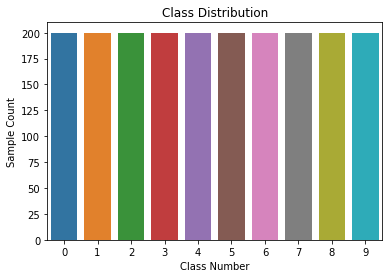

In [6]:
# class distrubiton
plt.subplots(figsize=(6,4))
sns.countplot(labels)
plt.title("Class Distribution")
plt.xlabel("Class Number")
plt.ylabel("Sample Count")
plt.show()

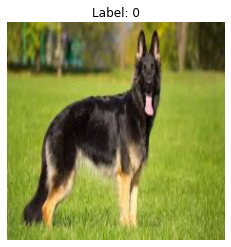

In [7]:
# checking random samples
def check_sample(idx):
    plt.imshow(data[idx])
    plt.title("Label: {}".format(labels[idx]))
    plt.axis("off")
    plt.show()
    
check_sample(28)

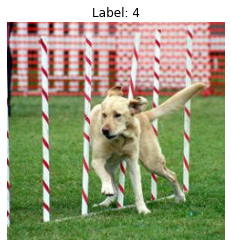

In [8]:
check_sample(899)

In [9]:
# label encoding
labels = to_categorical(labels,num_classes=10)
labels.shape

(2000, 10)

In [48]:
labels[501]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
# train test splitting
x_train,x_test,y_train,y_test = train_test_split(data,labels)

print("x_train shape ",x_train.shape)
print("x_test shape" ,x_test.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

# x_test = x_test/255.0 

x_train shape  (1500, 229, 229, 3)
x_test shape (500, 229, 229, 3)
y_train shape  (1500, 10)
y_test shape  (500, 10)


In [12]:
x_train,x_val,y_train, y_val = train_test_split(x_train,y_train,test_size= 0.25)

print("x_train shape ",x_train.shape)
print("x_val shape" ,x_val.shape)
print("y_train shape ",y_train.shape)
print("y_val shape ",y_val.shape)

# x_val = x_val/255.0

x_train shape  (1125, 229, 229, 3)
x_val shape (375, 229, 229, 3)
y_train shape  (1125, 10)
y_val shape  (375, 10)


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (229,229,3), include_top = False)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 229, 229, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 114, 114, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [14]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [15]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# # Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x)

# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  

# Add a final sigmoid layer for classification
x = layers.Dense  (10, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

optim = Adam(lr=1e-4)
model.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 229, 229, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 114, 114, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 114, 114, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

conv2d_34 (Conv2D)              (None, 12, 12, 128)  98304       mixed3[0][0]                     
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 12, 12, 128)  384         conv2d_34[0][0]                  
__________________________________________________________________________________________________
activation_34 (Activation)      (None, 12, 12, 128)  0           batch_normalization_34[0][0]     
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 12, 12, 128)  114688      activation_34[0][0]              
__________________________________________________________________________________________________
batch_normalization_35 (BatchNo (None, 12, 12, 128)  384         conv2d_35[0][0]                  
__________________________________________________________________________________________________
activation

In [17]:
# performing data argumentation by training image generator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
call = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

In [19]:
history = model.fit(train_datagen.flow(x_train,y_train),
                    validation_data=test_datagen.flow(x_val,y_val),
                    epochs=20,
                    verbose=1,
                   callbacks=call)


Epoch 1/20
36/36 [==============================] - 45s 1s/step - loss: 1.5543 - accuracy: 0.4836 - val_loss: 0.6004 - val_accuracy: 0.8427
Epoch 2/20
36/36 [==============================] - 47s 1s/step - loss: 0.6625 - accuracy: 0.7858 - val_loss: 0.4117 - val_accuracy: 0.8560
Epoch 3/20
36/36 [==============================] - 51s 1s/step - loss: 0.5001 - accuracy: 0.8471 - val_loss: 0.4150 - val_accuracy: 0.8667
Epoch 4/20
36/36 [==============================] - 53s 1s/step - loss: 0.4024 - accuracy: 0.8693 - val_loss: 0.3410 - val_accuracy: 0.8720
Epoch 5/20
36/36 [==============================] - 57s 2s/step - loss: 0.3916 - accuracy: 0.8720 - val_loss: 0.2572 - val_accuracy: 0.9147
Epoch 6/20
36/36 [==============================] - 63s 2s/step - loss: 0.3052 - accuracy: 0.9013 - val_loss: 0.2671 - val_accuracy: 0.8987
Epoch 7/20
36/36 [==============================] - 64s 2s/step - loss: 0.3282 - accuracy: 0.8916 - val_loss: 0.3947 - val_accuracy: 0.8693
Epoch 8/20
36/36 [==

In [20]:
result = model.evaluate(test_datagen.flow(x_test,y_test))

16/16 [==============================] - 19s 1s/step - loss: 0.3050 - accuracy: 0.8960


In [40]:
#model.save('model.h5')

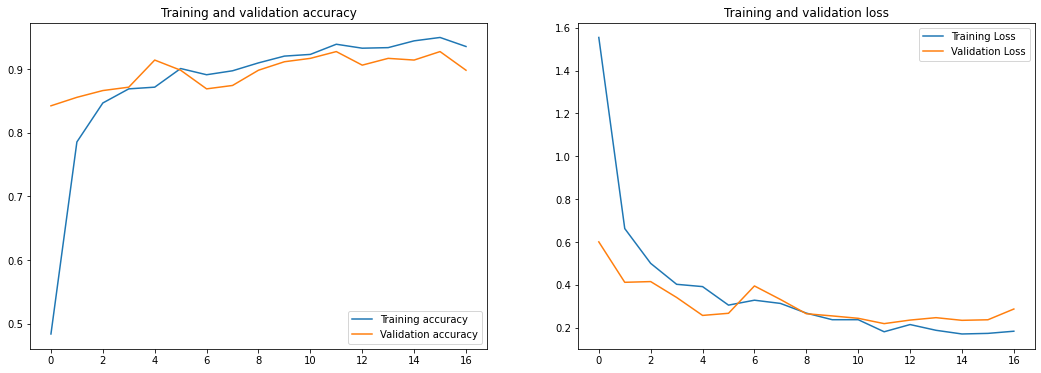

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc,label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
# from tensorflow.keras.models import load_model
# model = tf.keras.models.load_model('C:/Users/asus/Desktop/dl/dog_breed_identification/Saved_modl/model1/model1.h5')

# Predictions

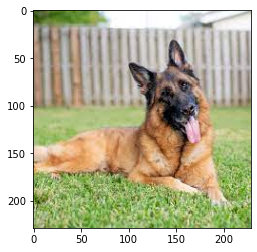

In [25]:
from tensorflow.keras.preprocessing import image
file_name='C:/Users/ASUS/Desktop/doc/Notes/download.jpg'       
img = image.load_img(file_name, target_size=(229,229))
plt.imshow(img)

In [38]:
def prediction_breed(file_name):
    try:      
        img = image.load_img(file_name, target_size=(229,229))
        plt.imshow(img)
        resized_img = image.img_to_array(img)
        resized_img = resized_img/255.0
        final_image = np.expand_dims(resized_img, axis=0)  #need 4th dimension
        np.set_printoptions(precision=5)
        predictions = model.predict(final_image)[0]
        index = np.argmax(predictions)
        print(predictions[index])
        print(LABELS[index])
    except OSError as e:
        print("Please provide right image format as well as image_path directory ")

0.75851685
Siberian_Husky


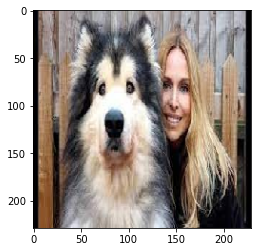

In [43]:
file_name='C:/Users/ASUS/Desktop/doc/Notes/alaskan_malmute.jfif'       
prediction_breed(file_name)

In [49]:
a = labels[501]

In [50]:
np.argmax(a, axis=None, out=None)

2

In [51]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
y_classes

[0,
 9,
 9,
 2,
 3,
 3,
 6,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 4,
 6,
 5,
 6,
 5,
 6,
 0,
 3,
 0,
 0,
 0,
 5,
 8,
 0,
 6,
 9,
 0,
 5,
 3,
 0,
 1,
 7,
 7,
 6,
 9,
 2,
 4,
 8,
 6,
 8,
 4,
 2,
 2,
 9,
 5,
 1,
 9,
 2,
 6,
 6,
 3,
 3,
 8,
 6,
 7,
 1,
 3,
 4,
 5,
 4,
 5,
 7,
 4,
 8,
 5,
 1,
 1,
 5,
 0,
 6,
 6,
 9,
 7,
 1,
 9,
 1,
 8,
 9,
 6,
 0,
 1,
 2,
 3,
 6,
 2,
 9,
 0,
 2,
 0,
 3,
 4,
 6,
 9,
 8,
 8,
 9,
 4,
 2,
 5,
 4,
 3,
 8,
 8,
 3,
 9,
 5,
 7,
 1,
 8,
 4,
 4,
 1,
 1,
 6,
 3,
 1,
 8,
 2,
 3,
 2,
 0,
 2,
 8,
 0,
 4,
 6,
 4,
 7,
 1,
 2,
 3,
 9,
 3,
 7,
 0,
 6,
 4,
 7,
 9,
 5,
 8,
 7,
 7,
 3,
 0,
 9,
 0,
 5,
 6,
 5,
 1,
 0,
 8,
 4,
 5,
 4,
 5,
 9,
 4,
 6,
 1,
 5,
 3,
 4,
 7,
 1,
 7,
 0,
 8,
 1,
 1,
 4,
 9,
 1,
 9,
 2,
 8,
 9,
 4,
 5,
 4,
 3,
 7,
 8,
 8,
 7,
 4,
 2,
 7,
 0,
 6,
 4,
 8,
 4,
 7,
 6,
 5,
 8,
 7,
 0,
 4,
 2,
 3,
 4,
 9,
 3,
 4,
 6,
 4,
 8,
 2,
 8,
 3,
 5,
 3,
 6,
 2,
 4,
 9,
 1,
 8,
 1,
 5,
 7,
 7,
 3,
 1,
 6,
 7,
 8,
 9,
 4,
 6,
 6,
 3,
 8,
 3,
 0,
 3,
 6,
 3,
 8,
 6,
 8,
 5,
 0,


In [55]:
def prediction(file_name):
    try:      
        img = image.load_img(file_name, target_size=(229,229))
        plt.imshow(img)
        resized_img = image.img_to_array(img)
        resized_img = resized_img/255.0
        final_image = np.expand_dims(resized_img, axis=0)  #need 4th dimension
        np.set_printoptions(precision=5)
        predictions = model.predict(final_image)[0]
        index = np.argmax(predictions)
        print(index)
#         print(predictions[index])
#         print(LABELS[index])
    except OSError as e:
        print("Please provide right image format as well as image_path directory ")

5


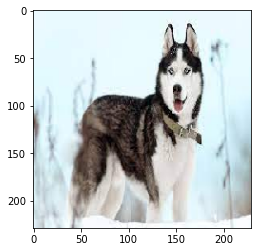

In [56]:
file_name='C:/Users/ASUS/Desktop/doc/Notes/1.jfif'       
prediction(file_name)

In [57]:
def prediction1(img):
    try:      
        resized_img = image.img_to_array(img)
        resized_img = resized_img/255.0
        final_image = np.expand_dims(resized_img, axis=0)  #need 4th dimension
        predictions = model.predict(final_image)[0]
        index = np.argmax(predictions)
        return index
#         print(predictions[index])
#         print(LABELS[index])
    except OSError as e:
        print("Please provide right image format")

In [58]:
len(y_test)

500

In [60]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
y_classes

[0,
 9,
 9,
 2,
 3,
 3,
 6,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 4,
 6,
 5,
 6,
 5,
 6,
 0,
 3,
 0,
 0,
 0,
 5,
 8,
 0,
 6,
 9,
 0,
 5,
 3,
 0,
 1,
 7,
 7,
 6,
 9,
 2,
 4,
 8,
 6,
 8,
 4,
 2,
 2,
 9,
 5,
 1,
 9,
 2,
 6,
 6,
 3,
 3,
 8,
 6,
 7,
 1,
 3,
 4,
 5,
 4,
 5,
 7,
 4,
 8,
 5,
 1,
 1,
 5,
 0,
 6,
 6,
 9,
 7,
 1,
 9,
 1,
 8,
 9,
 6,
 0,
 1,
 2,
 3,
 6,
 2,
 9,
 0,
 2,
 0,
 3,
 4,
 6,
 9,
 8,
 8,
 9,
 4,
 2,
 5,
 4,
 3,
 8,
 8,
 3,
 9,
 5,
 7,
 1,
 8,
 4,
 4,
 1,
 1,
 6,
 3,
 1,
 8,
 2,
 3,
 2,
 0,
 2,
 8,
 0,
 4,
 6,
 4,
 7,
 1,
 2,
 3,
 9,
 3,
 7,
 0,
 6,
 4,
 7,
 9,
 5,
 8,
 7,
 7,
 3,
 0,
 9,
 0,
 5,
 6,
 5,
 1,
 0,
 8,
 4,
 5,
 4,
 5,
 9,
 4,
 6,
 1,
 5,
 3,
 4,
 7,
 1,
 7,
 0,
 8,
 1,
 1,
 4,
 9,
 1,
 9,
 2,
 8,
 9,
 4,
 5,
 4,
 3,
 7,
 8,
 8,
 7,
 4,
 2,
 7,
 0,
 6,
 4,
 8,
 4,
 7,
 6,
 5,
 8,
 7,
 0,
 4,
 2,
 3,
 4,
 9,
 3,
 4,
 6,
 4,
 8,
 2,
 8,
 3,
 5,
 3,
 6,
 2,
 4,
 9,
 1,
 8,
 1,
 5,
 7,
 7,
 3,
 1,
 6,
 7,
 8,
 9,
 4,
 6,
 6,
 3,
 8,
 3,
 0,
 3,
 6,
 3,
 8,
 6,
 8,
 5,
 0,


In [59]:
x_test.shape

(500, 229, 229, 3)

In [63]:
Y_pred = []
for ex in x_test:
    Y_pred.append(prediction1(ex))
    
Y_pred

[0,
 9,
 9,
 2,
 3,
 3,
 6,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 4,
 6,
 5,
 6,
 5,
 6,
 0,
 3,
 0,
 0,
 9,
 5,
 8,
 0,
 6,
 9,
 0,
 5,
 3,
 0,
 2,
 7,
 7,
 6,
 9,
 2,
 3,
 8,
 6,
 8,
 4,
 2,
 2,
 9,
 5,
 1,
 9,
 2,
 6,
 6,
 3,
 3,
 8,
 6,
 7,
 1,
 3,
 4,
 5,
 4,
 5,
 7,
 4,
 8,
 5,
 1,
 1,
 5,
 8,
 6,
 6,
 9,
 7,
 1,
 3,
 1,
 8,
 9,
 6,
 0,
 2,
 2,
 3,
 6,
 2,
 9,
 0,
 2,
 0,
 3,
 4,
 6,
 6,
 8,
 8,
 9,
 4,
 2,
 5,
 4,
 3,
 4,
 8,
 3,
 9,
 2,
 6,
 1,
 8,
 4,
 3,
 1,
 1,
 6,
 3,
 1,
 8,
 2,
 3,
 2,
 0,
 2,
 8,
 5,
 4,
 7,
 4,
 7,
 1,
 2,
 6,
 9,
 3,
 7,
 0,
 6,
 6,
 7,
 9,
 5,
 8,
 7,
 7,
 3,
 0,
 9,
 0,
 5,
 6,
 5,
 1,
 0,
 8,
 4,
 5,
 4,
 5,
 9,
 3,
 6,
 1,
 5,
 3,
 4,
 7,
 1,
 8,
 1,
 8,
 1,
 1,
 1,
 0,
 2,
 9,
 2,
 8,
 9,
 4,
 5,
 4,
 3,
 2,
 8,
 8,
 7,
 4,
 2,
 7,
 0,
 6,
 4,
 8,
 4,
 7,
 6,
 5,
 8,
 7,
 0,
 4,
 8,
 3,
 3,
 9,
 3,
 4,
 6,
 4,
 8,
 4,
 8,
 3,
 5,
 3,
 6,
 2,
 4,
 9,
 1,
 8,
 1,
 5,
 7,
 7,
 3,
 1,
 6,
 7,
 8,
 9,
 4,
 6,
 6,
 3,
 8,
 3,
 0,
 4,
 6,
 3,
 8,
 6,
 8,
 5,
 0,


In [64]:
len(Y_pred)

500

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_classes, Y_pred)

0.896

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_classes, Y_pred, target_names=LABELS))

                  precision    recall  f1-score   support

 German_shephard       0.93      0.89      0.91        46
        Doberman       0.92      0.87      0.90        55
       Chihuahua       0.82      0.86      0.84        37
 Golden_Retriver       0.83      0.92      0.87        48
        Labrador       0.88      0.75      0.81        60
  Siberian_Husky       0.98      0.96      0.97        50
             Pug       0.80      0.94      0.86        54
  French_bulldog       0.91      0.89      0.90        47
        Shih_Tzu       0.94      0.94      0.94        51
Tibetian_Mastiff       0.96      0.94      0.95        52

        accuracy                           0.90       500
       macro avg       0.90      0.90      0.90       500
    weighted avg       0.90      0.90      0.90       500



In [68]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_classes, Y_pred)
print(cm)

[[41  1  0  0  0  1  0  0  1  2]
 [ 0 48  3  0  3  0  1  0  0  0]
 [ 0  0 32  0  1  0  2  1  1  0]
 [ 0  0  1 44  1  0  2  0  0  0]
 [ 1  2  1  8 45  0  3  0  0  0]
 [ 1  0  1  0  0 48  0  0  0  0]
 [ 0  0  0  0  0  0 51  3  0  0]
 [ 0  1  1  0  0  0  2 42  1  0]
 [ 0  0  0  0  1  0  2  0 48  0]
 [ 1  0  0  1  0  0  1  0  0 49]]


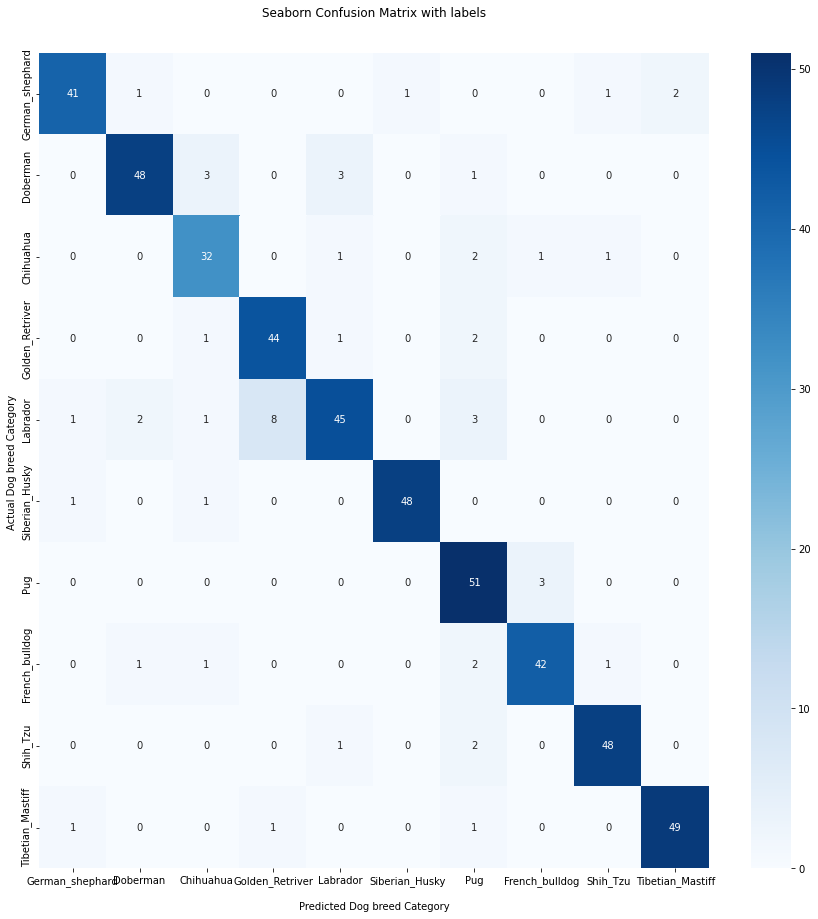

In [73]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Dog breed Category')
ax.set_ylabel('Actual Dog breed Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(LABELS)
ax.yaxis.set_ticklabels(LABELS)

## Display the visualization of the Confusion Matrix.
plt.show()

In [74]:
41/46

0.8913043478260869

In [76]:
41/44

0.9318181818181818